In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load Data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)
print("x_test.shape:", x_test.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


In [ ]:
# Build Μodel
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and Train Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 5ms/step - loss: 0.3306 - accuracy: 0.8926 - val_loss: 0.1278 - val_accuracy: 0.9613
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1080 - accuracy: 0.9672 - val_loss: 0.0997 - val_accuracy: 0.9689
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0749 - accuracy: 0.9771 - val_loss: 0.0785 - val_accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0572 - accuracy: 0.9824 - val_loss: 0.0661 - val_accuracy: 0.9789
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0460 - accuracy: 0.9859 - val_loss: 0.0590 - val_accuracy: 0.9819
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0387 - accuracy: 0.9883 - val_loss: 0.0521 - val_accuracy: 0.9839
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0349 - accuracy: 0.9891 - val_loss: 0.0538 - val_accura

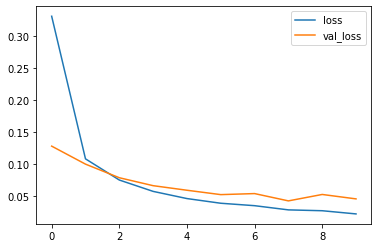

In [ ]:
# Plot Loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

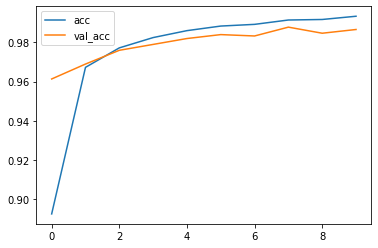

In [ ]:
# Plot Αccuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 1s 4ms/step
Confusion matrix, without normalization
[[ 972    0    0    1    0    0    5    1    1    0]
 [   0 1130    3    1    0    0    1    0    0    0]
 [   2    1 1024    2    0    0    0    1    2    0]
 [   0    0    3  999    0    2    0    3    3    0]
 [   0    0    0    0  958    0    2    2    1   19]
 [   0    0    0    6    0  882    1    1    1    1]
 [   3    3    2    0    0   11  937    0    1    1]
 [   0    7    4    0    2    0    0 1011    0    4]
 [   0    1    1    4    0    6    0    0  959    3]
 [   1    0    1    3    1    1    0    7    2  993]]


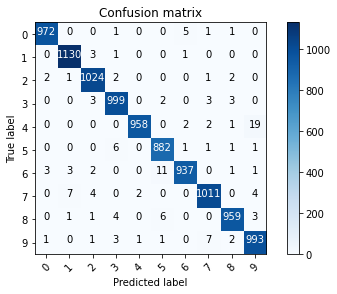

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

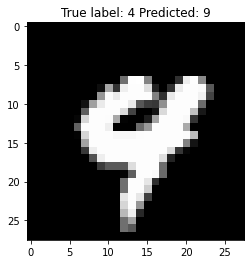

In [ ]:
# Show Μisclassified Εxamples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));